In [41]:
import pandas as pd

In [42]:
movies = pd.read_csv('data.csv', usecols = ['id', 'name', 'description'])
movies.head(10)

,id,name,description
0,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,724089,Gabriel's Inferno Part II,Professor Gabriel Emerson finally learns the t...
4,632632,Given,The film centers on the love relationship amon...
5,696374,Gabriel's Inferno,An intriguing and sinful exploration of seduct...
6,424,Schindler's List,The true story of how businessman Oskar Schind...
7,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
8,372058,Your Name.,High schoolers Mitsuha and Taki are complete s...
9,129,Spirited Away,"A young girl, Chihiro, becomes trapped in a st..."


In [43]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           100 non-null    int64 
 1   name         100 non-null    object
 2   description  100 non-null    object
dtypes: int64(1), object(2)
memory usage: 2.5+ KB


## Analysis

In [44]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [45]:
movies['name'] = movies['name'].astype('str')
name_corpus = ' '.join(movies['name'])

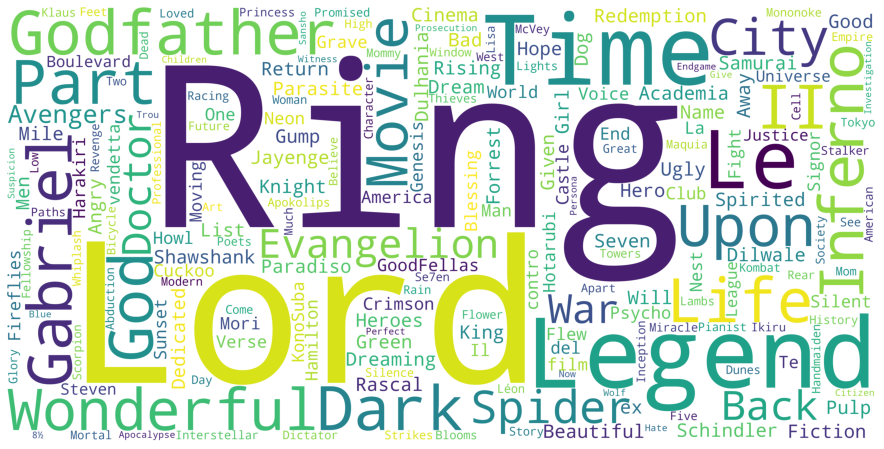

In [46]:
name_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(name_corpus)
plt.figure(figsize = (16,8))
plt.imshow(name_wordcloud)
plt.axis('off')
plt.show()

In [47]:
movies['description'] = movies['description'].astype('str')
description_corpus = ' '.join(movies['description'])

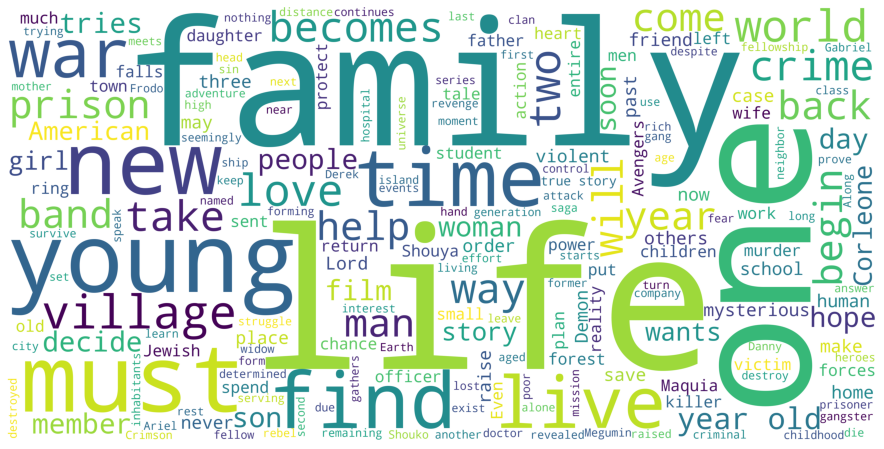

In [48]:
description_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(description_corpus)
plt.figure(figsize = (16,8))
plt.imshow(description_wordcloud)
plt.axis('off')
plt.show()

In [49]:
movies['content'] = movies[['name', 'description']].astype(str).apply(lambda x: ' // '.join(x), axis = 1)
movies['content'].fillna('Null', inplace = True)

In [50]:
movies

,id,name,description,content
0,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Dilwale Dulhania Le Jayenge // Raj is a rich, ..."
1,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,The Shawshank Redemption // Framed in the 1940...
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",The Godfather // Spanning the years 1945 to 19...
3,724089,Gabriel's Inferno Part II,Professor Gabriel Emerson finally learns the t...,Gabriel's Inferno Part II // Professor Gabriel...
4,632632,Given,The film centers on the love relationship amon...,Given // The film centers on the love relation...
...,...,...,...,...
95,20532,Sansho the Bailiff,In medieval Japan a compassionate governor is ...,Sansho the Bailiff // In medieval Japan a comp...
96,299536,Avengers: Infinity War,As the Avengers and their allies have continue...,Avengers: Infinity War // As the Avengers and ...
97,77338,The Intouchables,A true story of two men who should never have ...,The Intouchables // A true story of two men wh...
98,504253,I Want to Eat Your Pancreas,Spring time in April and the last of the cherr...,I Want to Eat Your Pancreas // Spring time in ...


## Training

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

### TF-IDF (Term Frequency - Inverse Document Frequency)
https://en.wikipedia.org/wiki/Tf%E2%80%93idf

In [52]:
tf = TfidfVectorizer(analyzer = 'word', ngram_range = (1, 2), min_df = 0, stop_words = 'english')
tfidf_matrix = tf.fit_transform(movies['content'])

### Cosine Similarity

https://en.wikipedia.org/wiki/Cosine_similarity


In [53]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [54]:
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.metrics.pairwise import cosine_similarity

# tf = CountVectorizer(stop_words = 'english')
# tfidf_matrix = tf.fit_transform(movies['content'])

# cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

store the top 100 similar items

In [55]:
results = {}
for idx, row in movies.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1]
    similar_items = [(cosine_similarities[idx][i], movies['id'][i]) for i in similar_indices]
    results[row['id']] = similar_items[1:]

In [56]:
type(results)

dict

## Prediction

In [57]:
def getName(id):
    return movies.loc[movies['id'] == id]['name'].tolist()

def getDesc(id):
    return movies.loc[movies['id'] == id]['description'].tolist()

In [58]:
def recommend(item_id, num):
    print('{} movies similar to {}'.format(num, getName(item_id)))
    print('---------------------------------------')
    recs = results[item_id][:num]
    for i, rec in enumerate(recs):
        print('Movie Id:    {}'.format(rec[1]))
        print('score:       {}'.format(rec[0]))
        print('Name:        {}'.format(getName(rec[1])))
        print('Description: {}\n'.format(getDesc(rec[1])))
       

In [59]:
recommend(item_id = 155, num = 5)

5 movies similar to ['The Dark Knight']
---------------------------------------
Movie Id:    618344
score:       0.02964050100696792
Name:        ['Justice League Dark: Apokolips War']
Description: ['Earth is decimated after intergalactic tyrant Darkseid has devastated the Justice League in a poorly executed war by the DC Super Heroes. Now the remaining bastions of good – the Justice League, Teen Titans, Suicide Squad and assorted others – must regroup, strategize and take the war to Darkseid in order to save the planet and its surviving inhabitants.']

Movie Id:    299534
score:       0.023844339021143773
Name:        ['Avengers: Endgame']
Description: ["After the devastating events of Avengers: Infinity War, the universe is in ruins due to the efforts of the Mad Titan, Thanos. With the help of remaining allies, the Avengers must assemble once more in order to undo Thanos' actions and restore order to the universe once and for all, no matter what consequences may be in store."]

Movie

In [62]:
recommend(item_id = 120, num = 5)

5 movies similar to ['The Lord of the Rings: The Fellowship of the Ring']
---------------------------------------
Movie Id:    122
score:       0.12234762789528082
Name:        ['The Lord of the Rings: The Return of the King']
Description: ["Aragorn is revealed as the heir to the ancient kings as he, Gandalf and the other members of the broken fellowship struggle to save Gondor from Sauron's forces. Meanwhile, Frodo and Sam take the ring closer to the heart of Mordor, the dark lord's realm."]

Movie Id:    121
score:       0.1118932744203952
Name:        ['The Lord of the Rings: The Two Towers']
Description: ['Frodo and Sam are trekking to Mordor to destroy the One Ring of Power while Gimli, Legolas and Aragorn search for the orc-captured Merry and Pippin. All along, nefarious wizard Saruman awaits the Fellowship members at the Orthanc Tower in Isengard.']

Movie Id:    128
score:       0.03401503026773676
Name:        ['Princess Mononoke']
Description: ['Ashitaka, a prince of the disa